In [17]:
import pandas as pd
import pandas_ta as ta 
import numpy as np
from statsmodels.regression.rolling import RollingOLS
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
#Comment marchent les index et multi-index
index = pd.MultiIndex.from_tuples([
    ('A', 'X'),
    ('A', 'Y'),
    ('B', 'X'),
    ('B', 'Y')
], names=['Level1_ligne', 'Level2_ligne'])

columns = pd.MultiIndex.from_tuples([
    ('col1','a'),
    ('col1','b'),
    ('col2','a'),
    ('col2','b')],
    names=['Level1_col','Level2_col'])
df = pd.DataFrame([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]], index=index, columns=columns)

df

Level1_col                col1     col2    
Level2_col                   a   b    a   b
Level1_ligne Level2_ligne                  
A            X               1   2    3   4
             Y               5   6    7   8
B            X               9  10   11  12
             Y              13  14   15  16

In [15]:
new_col = pd.DataFrame({
    ('col3','a'):[17,289,90,99],
    ('col3','b') : [18,19,20,21]
},index = index)
df = pd.concat([df,new_col],axis=1)
df

col1     col2     col3    
                             a   b    a   b    a   b
Level1_ligne Level2_ligne                           
A            X               1   2    3   4   17  18
             Y               5   6    7   8  289  19
B            X               9  10   11  12   90  20
             Y              13  14   15  16   99  21

In [24]:
# Création d'un DataFrame avec un index de dates mensuelles
date_rng = pd.date_range(start='2010-01-01', end='2020-12-31', freq='M')
df = pd.DataFrame(date_rng, columns=['date'])
df['data'] = range(len(df))
df.set_index('date', inplace=True)

df

/var/folders/x5/qmtm2vv54qzcmzx4h964n_nh0000gp/T/ipykernel_60110/1684981559.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_rng = pd.date_range(start='2010-01-01', end='2020-12-31', freq='M')


,data
date,
2010-01-31,0
2010-02-28,1
2010-03-31,2
2010-04-30,3
2010-05-31,4
...,...
2020-08-31,127
2020-09-30,128
2020-10-31,129


In [29]:
# Création d'un DataFrame simple
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
})

# Appliquer une fonction lambda pour calculer la moyenne de chaque colonne
result = df.apply(lambda x: x-2)
result

,A,B,C
0,-1,2,5
1,0,3,6
2,1,4,7


In [53]:
# Création d'une série temporelle avec des données de prix mensuels
date_rng = pd.date_range(start='2023-01-01', end='2023-12-31',freq='M')
prices = [100, 102, 105, 107, 110, 112, 115, 113, 118, 120, 125, 130]
df = pd.DataFrame(prices, index=date_rng, columns=['adj_close'])
df['return 1m']= df['adj_close'].pct_change(1)
df

/var/folders/x5/qmtm2vv54qzcmzx4h964n_nh0000gp/T/ipykernel_60110/2999001747.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_rng = pd.date_range(start='2023-01-01', end='2023-12-31',freq='M')


,adj_close,return 1m
2023-01-31,100,NaN
2023-02-28,102,0.020000
2023-03-31,105,0.029412
2023-04-30,107,0.019048
2023-05-31,110,0.028037
2023-06-30,112,0.018182
2023-07-31,115,0.026786
2023-08-31,113,-0.017391
2023-09-30,118,0.044248
2023-10-31,120,0.016949


In [109]:
outlier_cutoff = 0.005
np.random.seed(42)  # Pour la reproductibilité
dates = pd.date_range('2020-01-01', periods=100)
prices = np.random.normal(100, 10, size=100)  # Simule des prix autour de 100 avec une certaine variance
prices[5] = 50   # Introduit un outlier bas
prices[20] = 180  # Introduit un outlier haut

df = pd.DataFrame({'date': dates, 'adj close': prices})
df.set_index('date', inplace=True)
df['returns'] = df['adj close'].pct_change()
lower = df['returns'].quantile(outlier_cutoff)
upper = df['returns'].quantile(1 - outlier_cutoff)
print(lower, upper)

-0.4728098362367757 1.2081304659948504


In [116]:
df['returns_cliped']=df['returns'].clip(lower,upper)
df['returns_cliped_2']=df['returns'].pipe(lambda x: x.clip(lower=lower, upper=upper))
print(df['returns_cliped_2']==df['returns_cliped'])


date
2020-01-01    False
2020-01-02     True
2020-01-03     True
2020-01-04     True
2020-01-05     True
              ...  
2020-04-05     True
2020-04-06     True
2020-04-07     True
2020-04-08     True
2020-04-09     True
Length: 100, dtype: bool


In [119]:
index_diff = df[df['returns_cliped_2'] != df['returns_cliped']].index
print(index_diff)

DatetimeIndex(['2020-01-01'], dtype='datetime64[ns]', name='date', freq=None)


In [120]:
arrays = [['A', 'A', 'B', 'B'], [1, 2, 1, 2]]
index = pd.MultiIndex.from_arrays(arrays, names=('letter', 'number'))
df = pd.DataFrame({'value': [10, 20, 30, 40]}, index=index)
df

value
letter number       
A      1          10
       2          20
B      1          30
       2          40

In [125]:
df.index.get_level_values(0).unique()

Index(['A', 'B'], dtype='object', name='letter')

In [124]:
df.index.levels[0]

Index(['A', 'B'], dtype='object', name='letter')

In [77]:


# Générer des données
np.random.seed(0)
nobs = 100
x = np.random.normal(size=(nobs, 2))
X = sm.add_constant(x)  # Ajouter une constante (intercept)
beta = [1, 0.5, -0.2]
y = np.dot(X, beta) + np.random.normal(size=nobs)

# Créer un DataFrame
df = pd.DataFrame(X, columns=['const', 'x1', 'x2'])
df['y'] = y
df
# Ajuster une Rolling OLS avec une fenêtre de 20
window = 20
rolling_ols = RollingOLS(df['y'], df[['const', 'x1', 'x2']], window=window)
rolling_res = rolling_ols.fit()

# Afficher les coefficients de régression sur la fenêtre roulante
print(rolling_res.params)

       const        x1        x2
0        NaN       NaN       NaN
1        NaN       NaN       NaN
2        NaN       NaN       NaN
3        NaN       NaN       NaN
4        NaN       NaN       NaN
..       ...       ...       ...
95  1.229620  0.243974 -0.271449
96  1.220021  0.243293 -0.261948
97  1.269249  0.269517 -0.264680
98  1.374961  0.436206 -0.368281
99  1.325431  0.566405 -0.336082

[100 rows x 3 columns]


In [15]:
import pickle

# Chargement de la variable data depuis le fichier
with open('data.pkl', 'rb') as f:
    data = pickle.load(f)

data

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2017-10-31 AAL      45.534161         -0.000363  41.051759  3.849110   
           AAPL     39.667976         -0.001105  69.196765  3.593605   
           ABBV     66.876801         -0.036142  55.247870  4.187696   
           ABT      48.237465         -0.005677  53.844898  3.887384   
           ACN     128.834717         -0.004274  69.365359  4.798335   
...                       ...               ...        ...       ...   
2023-09-30 VRTX    351.690002          0.000037  52.406728  5.838959   
           VZ       30.755375         -0.001680  42.222494  3.451862   
           WFC      39.479488         -0.000317  40.920297  3.689633   
           WMT      53.445202         -0.000074  54.722564  3.982182   
           XOM     112.466644         -0.000205  59.440187  4.679146   

                     bb_mid   bb_high       atr      macd  return_1m  \
date       ticker                                                      
2017-10-31 AAL     3.921750  3.994389  1.125075 -0.018698  -0.014108   
           AAPL    3.640476  3.687347 -0.544507 -0.039275   0.096807   
           ABBV    4.234050  4.280405  1.610790  0.473813   0.022728   
           ABT     3.910952  3.934519 -0.122964  0.276133   0.021276   
           ACN     4.838013  4.877691  0.133206  0.352342   0.064180   
...                     ...       ...       ...       ...        ...   
2023-09-30 VRTX    5.859127  5.879295  0.029799  0.027907   0.009617   
           VZ      3.484054  3.516245 -2.269785 -0.350385  -0.056890   
           WFC     3.729990  3.770346 -1.480986 -0.282325  -0.015500   
           WMT     3.999651  4.017120 -2.595188  0.399460  -0.000676   
           XOM     4.719239  4.759332 -1.303970  1.400622   0.046947   

                   return_2m  return_3m  return_6m  return_9m  return_12m  
date       ticker                                                          
2017-10-31 AAL      0.022981  -0.023860   0.016495   0.007008    0.012702  
           AAPL     0.015249   0.044955   0.028875   0.038941    0.035228  
           ABBV     0.098590   0.091379   0.056495   0.047273    0.044026  
           ABT      0.034308   0.034801   0.038672   0.031320    0.029294  
           ACN      0.048454   0.037203   0.028692   0.027398    0.018728  
...                      ...        ...        ...        ...         ...  
2023-09-30 VRTX    -0.000923  -0.000208   0.018495   0.022140    0.016337  
           VZ      -0.016122  -0.033458  -0.021495  -0.014100   -0.006158  
           WFC     -0.057917  -0.013554   0.016712   0.000702    0.003255  
           WMT      0.010014   0.012354   0.017574   0.016553    0.020256  
           XOM      0.046139   0.030496   0.012838   0.008747    0.027037  

[10342 rows x 14 columns]

In [78]:
# import pandas_datareader.data as web

# factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3',
#                                'famafrench',
#                                start='2010')[0].drop('RF', axis=1)
# factor_data.index = factor_data.index.to_timestamp()
# factor_data = factor_data.resample('M').last().div(100)
# factor_data.index.name = 'date'
# factor_data = factor_data.join(data['return_1m'])
# factor_data = factor_data.sort_index(level=0) 
factor_data.xs('AAPL',level=1)

,Mkt-RF,SMB,HML,RMW,CMA,return_1m
date,,,,,,
2017-10-31,0.0225,-0.0194,0.0019,0.0091,-0.0326,0.096807
2017-11-30,0.0312,-0.0032,-0.0003,0.0319,-0.0006,0.020278
2017-12-31,0.0106,-0.0106,0.0006,0.0075,0.0170,-0.015246
2018-01-31,0.0557,-0.0317,-0.0128,-0.0075,-0.0091,-0.010637
2018-02-28,-0.0365,0.0032,-0.0104,0.0048,-0.0228,0.068185
...,...,...,...,...,...,...
2023-05-31,0.0035,-0.0038,-0.0774,-0.0182,-0.0720,0.046058
2023-06-30,0.0647,0.0136,-0.0020,0.0227,-0.0162,0.094330
2023-07-31,0.0321,0.0284,0.0411,-0.0057,0.0062,0.012785


In [46]:
# observations = factor_data.groupby(level=1).size()
# valid_stocks = observations[observations>10]
# factor_data = factor_data[factor_data.index.get_level_values(1).isin(valid_stocks.index)]

In [71]:
grouped = factor_data.groupby(level=1, group_keys=False)
group_list = list(grouped)


                   Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2017-10-31 ACN     0.0225 -0.0194  0.0019  0.0091 -0.0326   0.064180
2017-11-30 ACN     0.0312 -0.0032 -0.0003  0.0319 -0.0006   0.039688
2017-12-31 ACN     0.0106 -0.0106  0.0006  0.0075  0.0170   0.034322
2018-01-31 ACN     0.0557 -0.0317 -0.0128 -0.0075 -0.0091   0.049709
2018-02-28 ACN    -0.0365  0.0032 -0.0104  0.0048 -0.0228   0.001929
...                   ...     ...     ...     ...     ...        ...
2023-05-31 ACN     0.0035 -0.0038 -0.0774 -0.0182 -0.0720   0.091441
2023-06-30 ACN     0.0647  0.0136 -0.0020  0.0227 -0.0162   0.008695
2023-07-31 ACN     0.0321  0.0284  0.0411 -0.0057  0.0062   0.028901
2023-08-31 ACN    -0.0239 -0.0368 -0.0108  0.0342 -0.0237   0.023455
2023-09-30 ACN    -0.0524 -0.0179  0.0145  0.0185 -0.0084  -0.040646

[72 rows x 6 columns]


In [76]:
betas.xs('ACN',level=1)

,Mkt-RF,SMB,HML,RMW,CMA
date,,,,,
2017-10-31,NaN,NaN,NaN,NaN,NaN
2017-11-30,NaN,NaN,NaN,NaN,NaN
2017-12-31,NaN,NaN,NaN,NaN,NaN
2018-01-31,NaN,NaN,NaN,NaN,NaN
2018-02-28,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2023-05-31,1.294589,-0.329486,-0.204227,0.466364,-0.199306
2023-06-30,1.237272,-0.446571,-0.289886,0.360305,-0.071429
2023-07-31,1.246388,-0.377304,-0.285118,0.318143,-0.050496


In [75]:
betas = (factor_data.groupby(level=1,
                            group_keys=False)
         .apply(lambda x: RollingOLS(endog=x['return_1m'], 
                                     exog=sm.add_constant(x.drop('return_1m', axis=1)),
                                     window=min(24, x.shape[0]),
                                     min_nobs=len(x.columns))
         .fit(params_only=True)
         .params
         .drop('const', axis=1)))



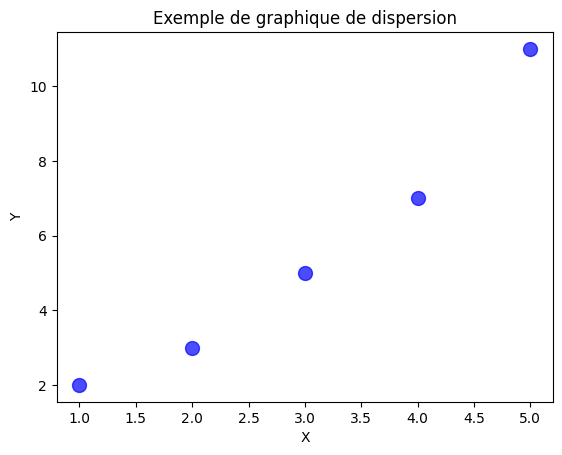

In [18]:

# Données pour l'exemple
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# Créer un graphique de dispersion
plt.scatter(x, y, color='blue', s=100, alpha=0.7, marker='o')

# Ajouter des titres et des labels
plt.title('Exemple de graphique de dispersion')
plt.xlabel('X')
plt.ylabel('Y')

# Afficher le graphique
plt.show()